# Assignment Day 27:

This notebook captures the assignment for Day 27:
        1. Find the optimal K value for the kNN algorithm for titanic dataset
        
        2. SVM Assignments for the dependent variable list as below with the accuracy score for titanic dataset
        "Pclass, Survied, Gender, Embarked, Parch, SibSp"

## Common functionalities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

### Load the DataSet

In [2]:
DS_PATH="./datasets/train.csv"
def load_dataset(path=DS_PATH):
    return pd.read_csv(path)

In [3]:
titanic_ds = load_dataset()
titanic_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [5]:
titanic_ds.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
C22 C26        3
              ..
A7             1
C86            1
C87            1
D7             1
B79            1
Name: Cabin, Length: 146, dtype: int64

In [6]:
titanic_ds.Ticket.value_counts()

1601        7
347082      7
CA. 2343    7
3101295     6
347088      6
           ..
27267       1
2690        1
367655      1
112050      1
348124      1
Name: Ticket, Length: 680, dtype: int64

In [7]:
titanic_ds.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
7.8000      1
13.8583     1
7.6292      1
15.0500     1
8.6833      1
Name: Fare, Length: 247, dtype: int64

In [8]:
titanic_ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Drop non applicable features

In [9]:
titanic_ds.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [10]:
titanic_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [11]:
titanic_ds.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

### Define datapipeline

In [12]:
def prepare_data(data, dv):
    cat_cols = ["Sex", "Embarked"]
    num_cols = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]
    
    if dv in cat_cols:
        cat_cols.remove(dv)
    elif dv in num_cols:
        num_cols.remove(dv)
    else:
        print("Invalid depent variable: {0}".format(dv))
        return None
    
    np = Pipeline([
        ('impute', KNNImputer(n_neighbors=2)),
        ('std scaler', StandardScaler()),
    ])
    
    fp = ColumnTransformer([
        ('num', np, num_cols),
        ('cat', OrdinalEncoder(), cat_cols),
    ])
    
    return fp.fit_transform(data)

## K-Nearest Neighbour Routine

___Takes the dependent variable and perform the KNeighborsClassifier for ranges from 1 till the test_size index and respond with the accuracy score vector___

In [13]:
def KNeighbor(dv):
    y = titanic_ds[dv]
    X = titanic_ds.drop([dv], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)
    
    out = pd.DataFrame({"AccuracyScore" : np.zeros(X_test.shape[0] + 1)})
    
    for k in out.index:
        if k <= 0: 
            continue
            
        model = KNeighborsClassifier(n_neighbors=k)
        
        clf = model.fit(prepare_data(X_train, dv), y_train)
        y_pred = clf.predict(prepare_data(X_test, dv))
        
        out.iloc[k] = accuracy_score(y_test, y_pred) * 100
        
    return out

### KNN for Pclass

In [14]:
P = KNeighbor('Pclass')
P.head()

,AccuracyScore
0,0.000000
1,82.022472
2,77.153558
3,77.153558
4,77.528090


#### Plot  Accuracy Score

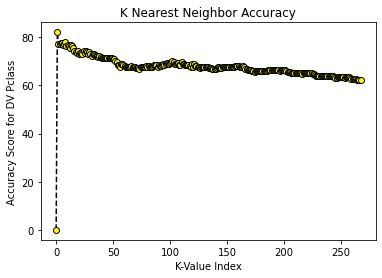

In [15]:
plt.plot(P.index, P.AccuracyScore, linestyle='dashed', marker='o', markerfacecolor="yellow", color='k')
plt.xlabel("K-Value Index")
plt.ylabel("Accuracy Score for DV Pclass")
plt.title("K Nearest Neighbor Accuracy")
plt.show();

#### Top Accuracy Scores

In [16]:
P.AccuracyScore.sort_values(ascending=False).head(5)

1    82.022472
8    77.902622
5    77.528090
4    77.528090
7    77.153558
Name: AccuracyScore, dtype: float64

### KNN for Survived

In [17]:
S = KNeighbor('Survived')
S.head()

,AccuracyScore
0,0.000000
1,77.528090
2,77.528090
3,79.026217
4,77.153558


#### Plot  Accuracy Score

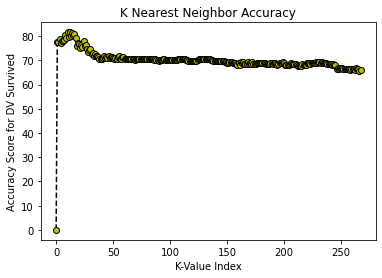

In [18]:
plt.plot(S.index, S.AccuracyScore, linestyle='dashed', marker='o', markerfacecolor="y", color='k')
plt.xlabel("K-Value Index")
plt.ylabel("Accuracy Score for DV Survived")
plt.title("K Nearest Neighbor Accuracy")
plt.show();

#### Top Accuracy Scores

In [19]:
S.AccuracyScore.sort_values(ascending=False).head()

10    81.647940
12    81.647940
14    81.273408
16    80.898876
15    80.524345
Name: AccuracyScore, dtype: float64

### KNN for Gender

In [20]:
G = KNeighbor('Sex')
G.head()

,AccuracyScore
0,0.000000
1,75.280899
2,71.910112
3,76.029963
4,76.029963


#### Plot Accuracy Score

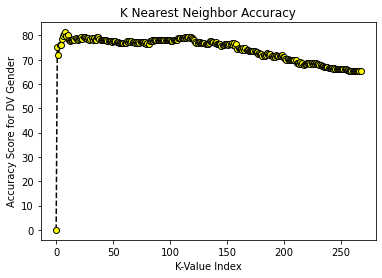

In [21]:
plt.plot(G.index, G.AccuracyScore, linestyle='dashed', marker='o', markerfacecolor="yellow", color='k')
plt.xlabel("K-Value Index")
plt.ylabel("Accuracy Score for DV Gender")
plt.title("K Nearest Neighbor Accuracy")
plt.show();

#### Top Accuracy Scores

In [22]:
G.AccuracyScore.sort_values(ascending=False).head()

8     81.273408
7     80.524345
10    80.149813
6     79.775281
9     79.775281
Name: AccuracyScore, dtype: float64

### KNN for Embarked

In [23]:
E = KNeighbor('Embarked')
E.head()

,AccuracyScore
0,0.000000
1,71.535581
2,62.172285
3,70.411985
4,71.910112


#### Plot Accuracy Score

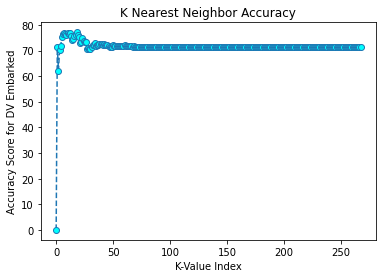

In [24]:
plt.plot(E.index, E.AccuracyScore, linestyle='dashed', marker='o', markerfacecolor="cyan")
plt.xlabel("K-Value Index")
plt.ylabel("Accuracy Score for DV Embarked")
plt.title("K Nearest Neighbor Accuracy")
plt.show();

#### Top Accuracy Scores

In [25]:
E.AccuracyScore.sort_values(ascending=False).head()

18    77.153558
10    76.779026
12    76.779026
7     76.779026
11    76.404494
Name: AccuracyScore, dtype: float64

### KNN for SibSp

In [26]:
SS = KNeighbor('SibSp')
SS.head()

,AccuracyScore
0,0.000000
1,74.157303
2,75.280899
3,75.280899
4,74.157303


#### Plot Accuracy Score

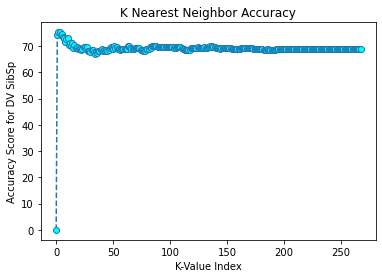

In [27]:
plt.plot(SS.index, SS.AccuracyScore, linestyle='dashed', marker='o', markerfacecolor="cyan")
plt.xlabel("K-Value Index")
plt.ylabel("Accuracy Score for DV SibSp")
plt.title("K Nearest Neighbor Accuracy")
plt.show();

#### Top Accuracy Scores

In [28]:
SS.AccuracyScore.sort_values(ascending=False).head()

2    75.280899
3    75.280899
5    74.531835
1    74.157303
4    74.157303
Name: AccuracyScore, dtype: float64

### KNN for Parch

In [29]:
PC = KNeighbor('Parch')
PC.head()

,AccuracyScore
0,0.000000
1,76.404494
2,79.026217
3,78.651685
4,78.277154


#### Plot Accuracy Score

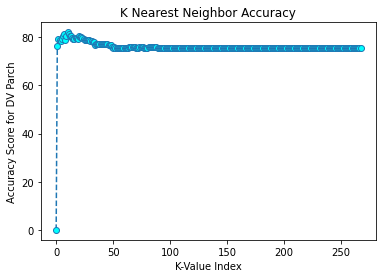

In [30]:
plt.plot(PC.index, PC.AccuracyScore, linestyle='dashed', marker='o', markerfacecolor="cyan")
plt.xlabel("K-Value Index")
plt.ylabel("Accuracy Score for DV Parch")
plt.title("K Nearest Neighbor Accuracy")
plt.show();

#### Top Accuracy Scores

In [31]:
PC.AccuracyScore.sort_values(ascending=False).head()

10    82.022472
11    81.273408
7     81.273408
9     80.524345
20    80.524345
Name: AccuracyScore, dtype: float64

## SVM Model Routine

___Takes the Dependent Variable as the input and perform the data preparation and SVC model, predict the test set accuracy and plot the confusion matrix___

In [32]:
def DefSVM(dv):
    y = titanic_ds[dv]
    X = titanic_ds.drop([dv], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)
    
    out = pd.DataFrame({"AccuracyScore" : np.zeros(X_test.shape[0] + 1)})
    
    model = SVC(gamma=0.01, C=100)
    
    clf = model.fit(prepare_data(X_train, dv), y_train)
    
    y_pred = clf.predict(prepare_data(X_test, dv))
    
    print("Accuracy score for Dependendent Variable '{0}' is: {1}".
          format(dv, accuracy_score(y_test, y_pred) * 100))
    plot_confusion_matrix(clf, prepare_data(X_test, dv), y_test);


### SVM for Survived

Accuracy score for Dependendent Variable 'Survived' is: 83.14606741573034


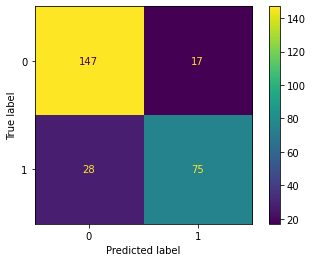

In [33]:
DefSVM('Survived')

### SVM for Pclass

Accuracy score for Dependendent Variable 'Pclass' is: 82.02247191011236


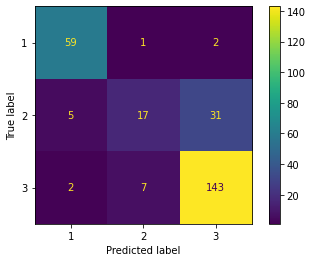

In [34]:
DefSVM('Pclass')

### SVM for Embarked

Accuracy score for Dependendent Variable 'Embarked' is: 71.53558052434457


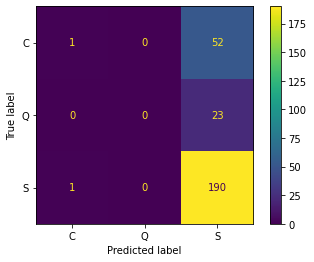

In [35]:
DefSVM('Embarked')

### SVM for SibSp

Accuracy score for Dependendent Variable 'SibSp' is: 71.91011235955057


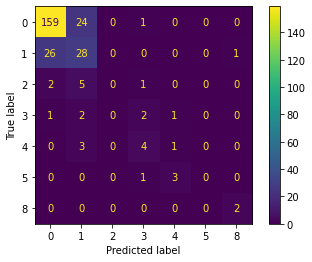

In [36]:
DefSVM('SibSp')

### SVM for Parch

Accuracy score for Dependendent Variable 'Parch' is: 82.77153558052434


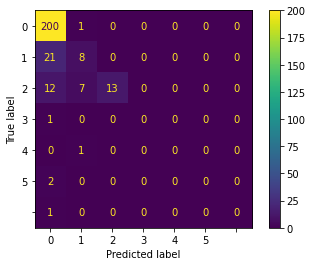

In [37]:
DefSVM('Parch')

### SVM for Gender

Accuracy score for Dependendent Variable 'Sex' is: 79.02621722846442


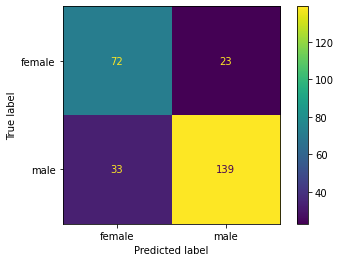

In [38]:
DefSVM('Sex')